# Tweepy Sentiment Analysis Homework Assignment - Brooke Cooper

* View the `tweepy` API documentation here: http://docs.tweepy.org/en/v3.8.0/getting_started.html
* View VaderSentiment documentation here: https://github.com/cjhutto/vaderSentiment

### Observable Trends in the Data
* We sampled the 100 most recent tweets for each of the news organizations (at virtually the same time across the news organiations) multiple times over the span of a couple days, and each time we then calculated their compound sentiment analysis scores.  What was somewhat surprising is that sentiment toward each news organization remained pretty much in line relative to other news organizations for the couple day period we measured sentiment.  
* We were also surprised by the fact that periodically, many of Fox News tweets tended to include little or no commentary and seemed to prefer to rely more on the web links to articles (presumably) by themselves.  It's not clear whether that aspect presents an issue in calibrating sentiment analysis, since Fox is effecting letting the links speak for themselves, and the Vadar sentimenet analysis does not hunt down the links.
* We also noted that Fox News seems to have a slower tweet schedule than the other news organizations, about half as fast from the samples we examined.  We speculate this may have something to do with the news organization perhaps drawing a line between the news reporting organization and the news commentary organization.  It could also be that its news reporters and/or commentators use independent twitter accounts, for a variety of reasons (e.g., brand protection).
* Not surprisingly, we also observed that tweets sometimes clustered in time and occasionally in sentiment, certainly reflecting the news cycle, the particular bias/orientation of each news organization, the preferences of each news organization's viewer base, and also likely breaking story sentiment (e.g., major events).  It is worth pointing out that bias is reflected not only adding one's slant to the news but also the choice of which stories to report or comment on.
* Lastly, had we normalized the x-axis timeline, we might have seen similar parallel clustering between news organizations based on the news cycle, bias, and geographic orientation (e.g., BBC).

In [1]:
%matplotlib inline

# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time
import calendar
from datetime import date, datetime, timedelta
import csv

# Output File (CSV)
output_data_file = "news_org_sentiment.csv"

In [2]:
# Extract various Twitter API keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

# The JSON Parser works differently with the Tweepy Cursor
# api = tweepy.API(auth)

In [4]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Pull 100 Tweets for Each News Organization Via Nested For Loops Using JSON and Without Cursor
* I originally tried to do this with Cursor.  It returned 1500 items, even when I set the individual batch limit at 100, which should have returned 500 tweets.  So I reverted to the tried and true original API in conjunction with JSON. 
* In any event, I didn't wait to sort out the Cursor vs. Original API issues.  I just forged ahead using Cursor for each news organization.  And once I had completed the effort, I circled back and finally completed the original iterative query.  In any event, I would be fine solving the issue either way.
* Even though I ultimately got through this exercise, I should spend more time with the API documentation.

In [5]:
# List of target news organization accounts
user_accounts = ["bbcnews", "cbsnews", "cnn", "foxnews", "nytimes"]

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
text = []
twitter_user = []

for x in range(5):
    
    # Loop for each news organization
    for user_account in user_accounts:
        
        # Capture the returned tweet data
        tweets = api.user_timeline(user_account, page=x)
        
        # For loop to process each of the 100 tweets returned for each request for each user account
        for t in tweets:
            
            tweet_id.append(t['user']['name'])
            created_at.append(t["created_at"])
            favorite_count.append(t["favorite_count"])
            text.append(t["text"])
            twitter_user.append(user_account)
        
# Build a tweets DataFrame
master_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': text    
    })

# set DataFrame to not truncate
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Preview dataframe
master_tweets_df

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,bbcnews,BBC News (UK),Tue Nov 24 02:30:41 +0000 2020,4,Apple's security chief charged with bribery https://t.co/lbtjVoqK4d
1,bbcnews,BBC News (UK),Tue Nov 24 02:28:26 +0000 2020,32,"Doctor Who, Call the Midwife and Mrs Brown on BBC Christmas TV line-up https://t.co/3sqE5eFhtC"
2,bbcnews,BBC News (UK),Tue Nov 24 02:05:57 +0000 2020,19,Wolves 1-1 Southampton: Theo Walcott's first goal since rejoining Saints earns draw https://t.co/5KHw1ZzcFW
3,bbcnews,BBC News (UK),Tue Nov 24 02:05:57 +0000 2020,13,Burnley 1-0 Crystal Palace: Chris Wood goal gives Burnley first league win of season https://t.co/wqwKyCkvnW
4,bbcnews,BBC News (UK),Tue Nov 24 02:05:57 +0000 2020,12,Stuart Hogg admits to 'schoolboy error' but praises Scotland after France loss https://t.co/MMYWucGb1V
5,bbcnews,BBC News (UK),Tue Nov 24 01:54:35 +0000 2020,55,Covid-19: Arrivals in England to be able to cut quarantine if they pay for test https://t.co/kSopjt5tA1
6,bbcnews,BBC News (UK),Tue Nov 24 01:05:11 +0000 2020,47,Newspaper headlines: 'Tis the season to be jolly careful' and Oxford vaccine news https://t.co/9VYToAnDC6
7,bbcnews,BBC News (UK),Mon Nov 23 22:35:33 +0000 2020,24,#BBCNewscast answers #BBCYourQuestions on today’s coronavirus developments\n \n💉 When could the Oxford University vac… https://t.co/FFusoWihGg
8,bbcnews,BBC News (UK),Mon Nov 23 22:32:07 +0000 2020,77,Covid-19: Boris Johnson faces political test over new tier system https://t.co/LHEqhpzUGI
9,bbcnews,BBC News (UK),Mon Nov 23 22:05:02 +0000 2020,2297,Michigan votes to certify Biden's win over Trump https://t.co/fsYoqIx0yb


In [6]:
len(master_tweets_df)

500

In [7]:
# Set tweets series as data source for analysis
tweet_text_series = master_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
master_tweets_df["Compound SA"] = compound
master_tweets_df["Positive SA"] = positive
master_tweets_df["Neutral SA"] = neutral
master_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
master_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
master_tweets_df.head()

 Compound count = 500
 Positive count = 500
 Neutral count = 500
 Negative count = 500


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,bbcnews,BBC News (UK),Tue Nov 24 02:30:41 +0000 2020,4,Apple's security chief charged with bribery https://t.co/lbtjVoqK4d,0.1531,0.261,0.543,0.196
1,bbcnews,BBC News (UK),Tue Nov 24 02:28:26 +0000 2020,32,"Doctor Who, Call the Midwife and Mrs Brown on BBC Christmas TV line-up https://t.co/3sqE5eFhtC",0.0000,0.000,1.000,0.000
2,bbcnews,BBC News (UK),Tue Nov 24 02:05:57 +0000 2020,19,Wolves 1-1 Southampton: Theo Walcott's first goal since rejoining Saints earns draw https://t.co/5KHw1ZzcFW,0.0000,0.000,1.000,0.000
3,bbcnews,BBC News (UK),Tue Nov 24 02:05:57 +0000 2020,13,Burnley 1-0 Crystal Palace: Chris Wood goal gives Burnley first league win of season https://t.co/wqwKyCkvnW,0.5859,0.213,0.787,0.000
4,bbcnews,BBC News (UK),Tue Nov 24 02:05:57 +0000 2020,12,Stuart Hogg admits to 'schoolboy error' but praises Scotland after France loss https://t.co/MMYWucGb1V,0.3400,0.310,0.450,0.240


In [8]:
len(master_tweets_df)

500

In [9]:
# Export to csv file
master_tweets_df.to_csv(output_data_file, index = False)

### Using the Cursor Method to capture 100 tweets per news organizations at a time into its own dataframe.

In [10]:
# Resetting the API method for Cursor
api = tweepy.API(auth)

### BBC News

In [11]:
# Set BBC News user account
user_account = "bbcnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
bbc_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
bbc_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,bbcnews,1331062654220300293,2020-11-24 02:30:41,4,Apple's security chief charged with bribery https://t.co/lbtjVoqK4d
1,bbcnews,1331062089784446977,2020-11-24 02:28:26,34,"Doctor Who, Call the Midwife and Mrs Brown on BBC Christmas TV line-up https://t.co/3sqE5eFhtC"
2,bbcnews,1331056431219564545,2020-11-24 02:05:57,19,Wolves 1-1 Southampton: Theo Walcott's first goal since rejoining Saints earns draw https://t.co/5KHw1ZzcFW
3,bbcnews,1331056430506520576,2020-11-24 02:05:57,13,Burnley 1-0 Crystal Palace: Chris Wood goal gives Burnley first league win of season https://t.co/wqwKyCkvnW
4,bbcnews,1331056428606509058,2020-11-24 02:05:57,12,Stuart Hogg admits to 'schoolboy error' but praises Scotland after France loss https://t.co/MMYWucGb1V


In [12]:
len(bbc_tweets_df)

100

In [13]:
# Set tweets series as data source for analysis
tweet_text_series = bbc_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
bbc_tweets_df["Compound SA"] = compound
bbc_tweets_df["Positive SA"] = positive
bbc_tweets_df["Neutral SA"] = neutral
bbc_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
bbc_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
bbc_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,bbcnews,1331062654220300293,2020-11-24 02:30:41,4,Apple's security chief charged with bribery https://t.co/lbtjVoqK4d,0.1531,0.261,0.543,0.196
1,bbcnews,1331062089784446977,2020-11-24 02:28:26,34,"Doctor Who, Call the Midwife and Mrs Brown on BBC Christmas TV line-up https://t.co/3sqE5eFhtC",0.0000,0.000,1.000,0.000
2,bbcnews,1331056431219564545,2020-11-24 02:05:57,19,Wolves 1-1 Southampton: Theo Walcott's first goal since rejoining Saints earns draw https://t.co/5KHw1ZzcFW,0.0000,0.000,1.000,0.000
3,bbcnews,1331056430506520576,2020-11-24 02:05:57,13,Burnley 1-0 Crystal Palace: Chris Wood goal gives Burnley first league win of season https://t.co/wqwKyCkvnW,0.5859,0.213,0.787,0.000
4,bbcnews,1331056428606509058,2020-11-24 02:05:57,12,Stuart Hogg admits to 'schoolboy error' but praises Scotland after France loss https://t.co/MMYWucGb1V,0.3400,0.310,0.450,0.240


The period began at 2020-11-23 01:02:21 and ended at 2020-11-24 02:30:41.
The duration was 1 days 01:28:20.


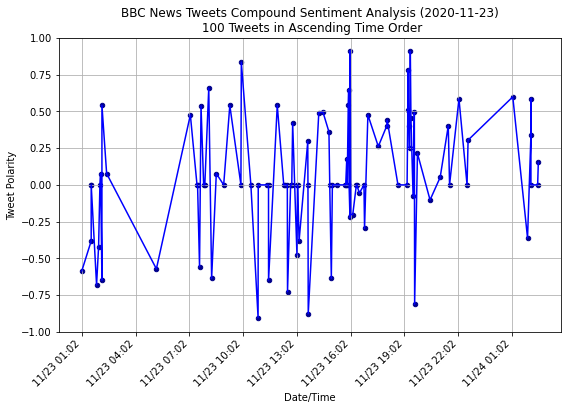

In [14]:
# Extract date-time stamps from dataframe to a list
time_series = bbc_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = bbc_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"BBC News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
bbc_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/bbc_output.png')

### CBS News

In [15]:
# Set CBS News user account
user_account = "cbsnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
cbs_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
cbs_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,cbsnews,1331059866669117443,2020-11-24 02:19:36,101,Feinstein will not seek Senate Judiciary Committee leadership https://t.co/6Vv2tL8XXU
1,cbsnews,1331054914244579328,2020-11-24 01:59:56,41,"Texas and Louisiana can cut Medicaid funding for Planned Parenthood, federal appeals court rules https://t.co/S9VWI6WSYl"
2,cbsnews,1331050833417539585,2020-11-24 01:43:43,0,"RT @CBSThisMorning: Who is your frontline hero?\n\nWe want to share their stories, whether they are doctors, teachers, or grocery store emplo…"
3,cbsnews,1331049828206456840,2020-11-24 01:39:43,93,Transgender inmate sues Georgia prison officials over alleged assaults https://t.co/YpDBvWYp6g
4,cbsnews,1331047407476482048,2020-11-24 01:30:06,138,The General Services Administration has told President-elect Joe Biden they're ready to start the formal transition process\n\n@NikolenDC explains what that decision means for the Biden-Harris transition team https://t.co/Gm2V50KcoJ https://t.co/9VAokO0FJF


In [16]:
len(cbs_tweets_df)

100

In [17]:
# Set tweets series as data source for analysis
tweet_text_series = cbs_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
cbs_tweets_df["Compound SA"] = compound
cbs_tweets_df["Positive SA"] = positive
cbs_tweets_df["Neutral SA"] = neutral
cbs_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
cbs_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
cbs_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,cbsnews,1331059866669117443,2020-11-24 02:19:36,101,Feinstein will not seek Senate Judiciary Committee leadership https://t.co/6Vv2tL8XXU,0.0000,0.000,1.000,0.000
1,cbsnews,1331054914244579328,2020-11-24 01:59:56,41,"Texas and Louisiana can cut Medicaid funding for Planned Parenthood, federal appeals court rules https://t.co/S9VWI6WSYl",-0.2732,0.000,0.870,0.130
2,cbsnews,1331050833417539585,2020-11-24 01:43:43,0,"RT @CBSThisMorning: Who is your frontline hero?\n\nWe want to share their stories, whether they are doctors, teachers, or grocery store emplo…",0.7269,0.272,0.728,0.000
3,cbsnews,1331049828206456840,2020-11-24 01:39:43,93,Transgender inmate sues Georgia prison officials over alleged assaults https://t.co/YpDBvWYp6g,-0.7783,0.000,0.541,0.459
4,cbsnews,1331047407476482048,2020-11-24 01:30:06,138,The General Services Administration has told President-elect Joe Biden they're ready to start the formal transition process\n\n@NikolenDC explains what that decision means for the Biden-Harris transition team https://t.co/Gm2V50KcoJ https://t.co/9VAokO0FJF,0.3612,0.079,0.921,0.000


The period began at 2020-11-23 08:39:34 and ended at 2020-11-24 02:19:36.
The duration was 0 days 17:40:02.


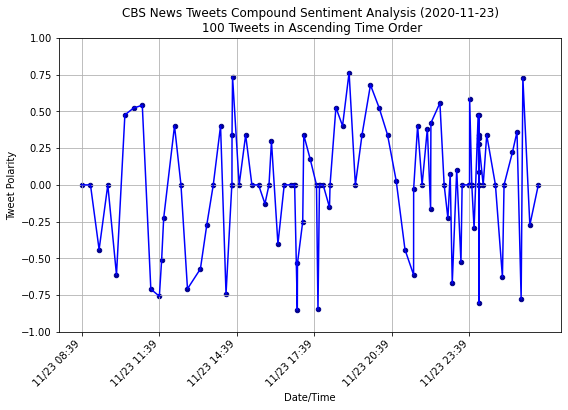

In [18]:
# Extract date-time stamps from dataframe to a list
time_series = cbs_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = cbs_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"CBS News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
cbs_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/cbs_output.png')

### CNN

In [19]:
# Set CNN user account
user_account = "CNN"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
cnn_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
cnn_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,CNN,1331062280012910593,2020-11-24 02:29:12,94,"Officers from the Utah Department of Public Safety's Aero Bureau were flying by helicopter last Wednesday, helping the Division of Wildlife Resources count bighorn sheep, when they spotted a shiny, silver metal monolith sticking out of the ground https://t.co/v3Ny7QWDQo"
1,CNN,1331059566457597953,2020-11-24 02:18:25,311,The campaign of a spoiler candidate appeared to help a Republican unseat the Democratic incumbent in a Florida Senate race by 32 votes. But who was behind it is anything but clear. https://t.co/2CTHTS0C3B
2,CNN,1331057475009777665,2020-11-24 02:10:06,343,"Americans need to be prepared for the possibility that they may feel a little unwell after they get a coronavirus vaccine, if one is authorized, members of a US Centers for Disease Control and Prevention advisory committee said https://t.co/8cWpj2CXFM"
3,CNN,1331055221410295808,2020-11-24 02:01:09,354,Thailand's ancient city of Lobpuri is well known for its rambunctious macaques. This man tried to soothe a group of monkeys with classic piano tunes. https://t.co/5zIuJ47Txz https://t.co/yccZPzrdCf
4,CNN,1331052697131290624,2020-11-24 01:51:07,197,Vaccine experts — including those who serve on advisory committees for the US Food and Drug Administration and the US Centers for Disease Control and Prevention — have questions about data released Monday by AstraZeneca about its Covid-19 vaccine https://t.co/olkVZSJ5jK


In [20]:
len(cnn_tweets_df)

100

In [21]:
# Set tweets series as data source for analysis
tweet_text_series = cnn_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
cnn_tweets_df["Compound SA"] = compound
cnn_tweets_df["Positive SA"] = positive
cnn_tweets_df["Neutral SA"] = neutral
cnn_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
cnn_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
cnn_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,CNN,1331062280012910593,2020-11-24 02:29:12,94,"Officers from the Utah Department of Public Safety's Aero Bureau were flying by helicopter last Wednesday, helping the Division of Wildlife Resources count bighorn sheep, when they spotted a shiny, silver metal monolith sticking out of the ground https://t.co/v3Ny7QWDQo",0.2960,0.055,0.945,0.0
1,CNN,1331059566457597953,2020-11-24 02:18:25,311,The campaign of a spoiler candidate appeared to help a Republican unseat the Democratic incumbent in a Florida Senate race by 32 votes. But who was behind it is anything but clear. https://t.co/2CTHTS0C3B,0.6428,0.145,0.855,0.0
2,CNN,1331057475009777665,2020-11-24 02:10:06,343,"Americans need to be prepared for the possibility that they may feel a little unwell after they get a coronavirus vaccine, if one is authorized, members of a US Centers for Disease Control and Prevention advisory committee said https://t.co/8cWpj2CXFM",0.2263,0.048,0.952,0.0
3,CNN,1331055221410295808,2020-11-24 02:01:09,354,Thailand's ancient city of Lobpuri is well known for its rambunctious macaques. This man tried to soothe a group of monkeys with classic piano tunes. https://t.co/5zIuJ47Txz https://t.co/yccZPzrdCf,0.5574,0.155,0.845,0.0
4,CNN,1331052697131290624,2020-11-24 01:51:07,197,Vaccine experts — including those who serve on advisory committees for the US Food and Drug Administration and the US Centers for Disease Control and Prevention — have questions about data released Monday by AstraZeneca about its Covid-19 vaccine https://t.co/olkVZSJ5jK,0.0000,0.000,1.000,0.0


The period began at 2020-11-23 05:00:11 and ended at 2020-11-24 02:29:12.
The duration was 0 days 21:29:01.


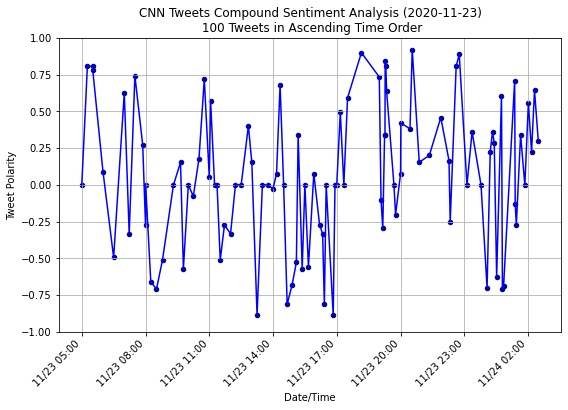

In [22]:
# Extract date-time stamps from dataframe to a list
time_series = cnn_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = cnn_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"CNN Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
cnn_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/cnn_output.png')

### Fox News

In [23]:
# Set Fox News user account
user_account = "foxnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
fox_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
fox_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,foxnews,1331060722567159808,2020-11-24 02:23:00,165,Rand Paul says DC US Attorney won't investigate RNC protestors who confronted him at RNC https://t.co/cFdPZicmJp
1,foxnews,1331057822021324800,2020-11-24 02:11:29,361,WATCH: NY business owners demand warrant when health inspector barges inside over Cuomo COVID restriction https://t.co/xNvp2wgxx2
2,foxnews,1331041888355442693,2020-11-24 01:08:10,470,'Jeopardy!' taps Ken Jennings as first guest host for show's restart https://t.co/BWzMXwayzD
3,foxnews,1331040870200643586,2020-11-24 01:04:07,236,Feinstein won't seek top Judiciary Committee spot after complaints from progressives https://t.co/2RJTrZddC6
4,foxnews,1331021295992135680,2020-11-23 23:46:20,1290,GSA chief informs President-elect Biden that formal transition process can begin https://t.co/XgJYp1pbLC


In [24]:
len(fox_tweets_df)

100

In [25]:
# Set tweets series as data source for analysis
tweet_text_series = fox_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
fox_tweets_df["Compound SA"] = compound
fox_tweets_df["Positive SA"] = positive
fox_tweets_df["Neutral SA"] = neutral
fox_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
fox_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
fox_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,foxnews,1331060722567159808,2020-11-24 02:23:00,165,Rand Paul says DC US Attorney won't investigate RNC protestors who confronted him at RNC https://t.co/cFdPZicmJp,-0.2023,0.0,0.893,0.107
1,foxnews,1331057822021324800,2020-11-24 02:11:29,361,WATCH: NY business owners demand warrant when health inspector barges inside over Cuomo COVID restriction https://t.co/xNvp2wgxx2,-0.3818,0.0,0.795,0.205
2,foxnews,1331041888355442693,2020-11-24 01:08:10,470,'Jeopardy!' taps Ken Jennings as first guest host for show's restart https://t.co/BWzMXwayzD,-0.5255,0.0,0.764,0.236
3,foxnews,1331040870200643586,2020-11-24 01:04:07,236,Feinstein won't seek top Judiciary Committee spot after complaints from progressives https://t.co/2RJTrZddC6,-0.5093,0.0,0.700,0.300
4,foxnews,1331021295992135680,2020-11-23 23:46:20,1290,GSA chief informs President-elect Biden that formal transition process can begin https://t.co/XgJYp1pbLC,0.0000,0.0,1.000,0.000


The period began at 2020-11-19 12:56:49 and ended at 2020-11-24 02:23:00.
The duration was 4 days 13:26:11.


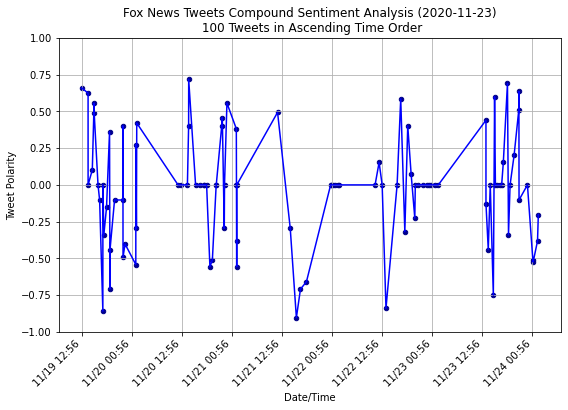

In [26]:
# Extract date-time stamps from dataframe to a list
time_series = fox_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=12))
dates = ticks_list

# Plot scatter
ax = fox_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"Fox News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
fox_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/fox_output.png')

### New York Times

In [27]:
# Set New York Times user account
user_account = "nytimes"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
nyt_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
nyt_tweets_df.head()

,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,nytimes,1331059994276614151,2020-11-24 02:20:07,383,"“Gilmore Girls” fans can spend some time with their favorite mother-daughter duo this week. The 2016 revival, “Gilmore Girls: A Year in the Life,” will air as a mini-series special on The CW. https://t.co/HtBF5x3dZf"
1,nytimes,1331054961732575234,2020-11-24 02:00:07,0,RT @shearm: TRANSITION -- The Trump admin finally relented and will allow the transition to begin after a day of critical losses in the att…
2,nytimes,1331049912042188800,2020-11-24 01:40:03,284,Sohla El-Waylly is here for all the stuffing leftovers. https://t.co/98fC1jki3C
3,nytimes,1331044886095798274,2020-11-24 01:20:05,0,RT @FrancescaDonner: #MuslimWomenAreEverything breaks apart the tired old tropes about Muslim women. It was born out of a “frustration that…
4,nytimes,1331039910082514944,2020-11-24 01:00:18,965,How will Covid-19 vaccines get to billions of people in the developing world? Bill Gates thinks he and his foundation are uniquely positioned to help. https://t.co/ah8fNGmmkC


In [28]:
len(nyt_tweets_df)

100

In [29]:
# Set tweets series as data source for analysis
tweet_text_series = nyt_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
nyt_tweets_df["Compound SA"] = compound
nyt_tweets_df["Positive SA"] = positive
nyt_tweets_df["Neutral SA"] = neutral
nyt_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
nyt_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
nyt_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


,User Acct,Tweet ID,Tweet Time,Favorite Count,Tweet Text,Compound SA,Positive SA,Neutral SA,Negative SA
0,nytimes,1331059994276614151,2020-11-24 02:20:07,383,"“Gilmore Girls” fans can spend some time with their favorite mother-daughter duo this week. The 2016 revival, “Gilmore Girls: A Year in the Life,” will air as a mini-series special on The CW. https://t.co/HtBF5x3dZf",0.6908,0.151,0.849,0.000
1,nytimes,1331054961732575234,2020-11-24 02:00:07,0,RT @shearm: TRANSITION -- The Trump admin finally relented and will allow the transition to begin after a day of critical losses in the att…,-0.4767,0.066,0.761,0.173
2,nytimes,1331049912042188800,2020-11-24 01:40:03,284,Sohla El-Waylly is here for all the stuffing leftovers. https://t.co/98fC1jki3C,0.0000,0.000,1.000,0.000
3,nytimes,1331044886095798274,2020-11-24 01:20:05,0,RT @FrancescaDonner: #MuslimWomenAreEverything breaks apart the tired old tropes about Muslim women. It was born out of a “frustration that…,-0.4404,0.000,0.868,0.132
4,nytimes,1331039910082514944,2020-11-24 01:00:18,965,How will Covid-19 vaccines get to billions of people in the developing world? Bill Gates thinks he and his foundation are uniquely positioned to help. https://t.co/ah8fNGmmkC,0.4019,0.097,0.903,0.000


The period began at 2020-11-23 07:15:04 and ended at 2020-11-24 02:20:07.
The duration was 0 days 19:05:03.


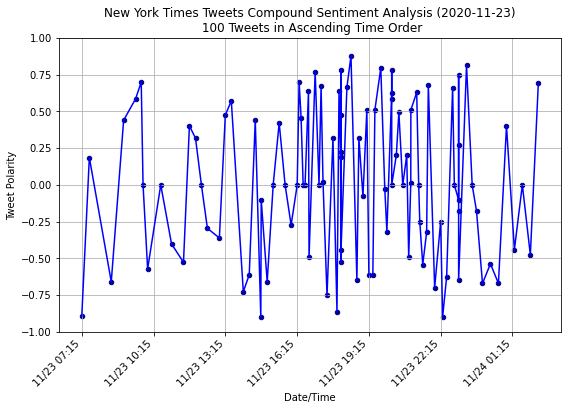

In [30]:
# Extract date-time stamps from dataframe to a list
time_series = nyt_tweets_df["Tweet Time"]

# Capture start and end date-time stamps
start_time = time_series.min()
end_time = time_series.max()

# Set start and end date-time stamps in format suitable for timedelta processing into an array
beg_period = np.datetime64(start_time) 
end_period = np.datetime64(end_time)

# Use timedelta processing to calculate an array that will then be used to product x-axis ticks/labels
ticks_list = np.arange(beg_period, end_period, timedelta(hours=3))
dates = ticks_list

# Plot scatter
ax = nyt_tweets_df.plot.scatter(x='Tweet Time',
                                y='Compound SA',
                                title=f"New York Times Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                                c='DarkBlue')

# Connect the scatter plots with a sequential order line
nyt_tweets_df.plot.line(x='Tweet Time',
                        y='Compound SA', 
                        ax=ax, 
                        style='b', 
                        grid=True, 
                        xticks=ticks_list, rot=45, 
                        legend=None,
                        figsize=(9,6))

# Set the x-axis label, y-axis label, y-axis limits, date-time format x-axis ticks
ax.set_xlabel("Date/Time")
ax.set_ylabel("Tweet Polarity")
ax.set_ylim(-1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

# Print the beginning and ending date-time values and calculated duration
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

# Save image as png-format file.
ax.figure.savefig('Images/nyt_output.png')

### Average Sentiment Analysis by News Organization

In [31]:
# Calculate average compound sentiment analysis for each news organization
bbc_asa = bbc_tweets_df["Compound SA"].mean()
cbs_asa = cbs_tweets_df["Compound SA"].mean()
cnn_asa = cnn_tweets_df["Compound SA"].mean()
fox_asa = fox_tweets_df["Compound SA"].mean()
nyt_asa = nyt_tweets_df["Compound SA"].mean()

In [32]:
# Create a dictionary of news organizations and their compound sentiment analysis scores (key, values)
news_dict = {"BBC News": bbc_asa, "CBS News": cbs_asa, "CNN": cnn_asa, "Fox News": fox_asa, "NY Times": nyt_asa}

# Convert dictionary to Series
news_asa = pd.Series(news_dict)

# Convert Series to DataFrame
news_asa_df = pd.DataFrame(news_asa).reset_index()

# Rename column
news_asa_df.rename(columns={"index": "News Org", 0: "Avg Comp SA"}, inplace=True)

# Display DataFrame
news_asa_df

,News Org,Avg Comp SA
0,BBC News,0.058715
1,CBS News,0.001723
2,CNN,0.072390
3,Fox News,-0.024215
4,NY Times,0.020877


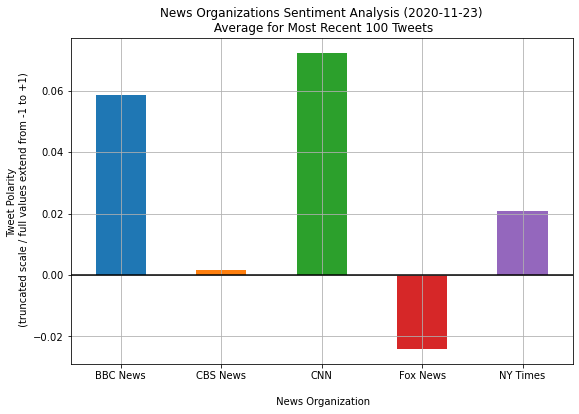

In [33]:
# Plot bar
ax = news_asa_df.plot.bar(x='News Org',
                          y='Avg Comp SA',
                          title=f"News Organizations Sentiment Analysis ({date.today()})\n Average for Most Recent 100 Tweets",
                          legend=None,
                          rot=0,
                          grid=True,
                          color=['C0', 'C1', 'C2', 'C3', 'C4'],
                          figsize=(9,6))

ax.set_ylim(, 3)

# Set the x-axis label, y-axis label, and create heavy line y=0
ax.set_xlabel("\n News Organization")
ax.set_ylabel("Tweet Polarity \n (truncated scale / full values extend from -1 to +1)")
ax.axhline(y=0, alpha=3, color='black')   

# Save image as png-format file.
ax.figure.savefig('Images/5_major_news_orgs_output.png')